In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [19]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [20]:
import matplotlib.pyplot as plt
def plot_image(image,i):
    fig = plt.gcf()
    fig.set_size_inches(3, 3)
    plt.imshow(image, cmap='binary')
    plt.title("Class {}".format(y_train[i]))
    plt.show()

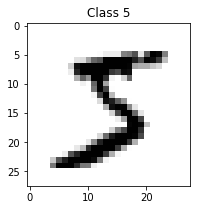

In [21]:
plot_image(X_train[0],0)


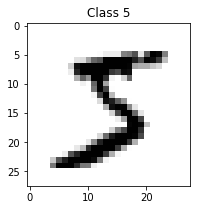

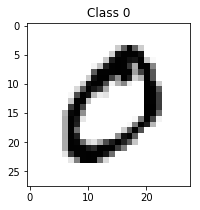

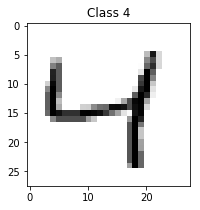

In [5]:
for i in range(3):
    plot_image(X_train[i],i)

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("訓練矩陣維度 shape", X_train.shape)
print("測試矩陣維度 shape", X_test.shape)

訓練矩陣維度 shape (60000, 784)
測試矩陣維度 shape (10000, 784)


In [7]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
y_train[0]

5

In [9]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))   
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
train_data=model.fit(X_train, Y_train,
          validation_split=0.2, epochs=8,
          batch_size=128, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
 - 16s - loss: 0.2874 - acc: 0.9118 - val_loss: 0.1333 - val_acc: 0.9587
Epoch 2/8
 - 13s - loss: 0.1166 - acc: 0.9651 - val_loss: 0.1014 - val_acc: 0.9689
Epoch 3/8
 - 12s - loss: 0.0847 - acc: 0.9739 - val_loss: 0.0853 - val_acc: 0.9746
Epoch 4/8
 - 13s - loss: 0.0683 - acc: 0.9788 - val_loss: 0.0831 - val_acc: 0.9744
Epoch 5/8
 - 13s - loss: 0.0570 - acc: 0.9819 - val_loss: 0.0809 - val_acc: 0.9770
Epoch 6/8
 - 13s - loss: 0.0477 - acc: 0.9847 - val_loss: 0.0813 - val_acc: 0.9783
Epoch 7/8
 - 13s - loss: 0.0431 - acc: 0.9861 - val_loss: 0.0931 - val_acc: 0.9764
Epoch 8/8
 - 13s - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0947 - val_acc: 0.9780


In [13]:
import matplotlib.pyplot as plt
def show_train_figure(train_data,train,validation):
    plt.plot(train_data.history[train])
    plt.plot(train_data.history[validation])
    plt.title('Train data')
    plt.xlabel('Epoch')
    plt.ylabel('Acuracy')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

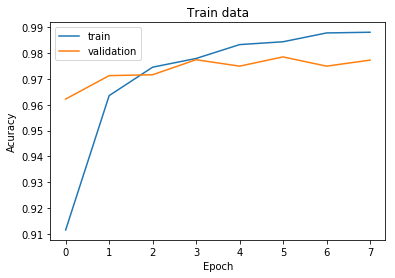

In [64]:
show_train_figure(train_data,'acc','val_acc')

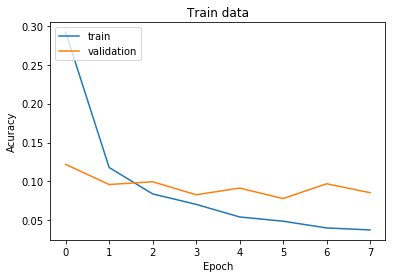

In [65]:
show_train_figure(train_data,'loss','val_loss')

In [66]:
score = model.evaluate(X_test, Y_test,)
print('Test score:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - ETA: 0s
Test score: 0.0751140333299
Test accuracy: 0.9798


In [67]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


10000/10000 [==============================] - ETA: 0s


In [79]:
predicted_classes

(10000,)

In [69]:
def plot_figures_labels(figures,labels,prediction,idx,num=9):
    figure=plt.gcf()
    figure.set_size_inches(15,15)
    if num>16:
        num=16
    for i in range(0,num):
            ax=plt.subplot(3,3,i+1)
            ax.imshow(figures[idx].reshape(28,28),cmap='binary')
            title='label='+str(labels[idx])
            if len(prediction)>0:
                title+=",predict="+str(prediction[idx])
                
            ax.set_title(title,fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
            idx+=1
    plt.show()

In [70]:
X_test[0]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

##### plot_figures_labels(X_test,y_test,predicted_classes,idx=150,num=10)

In [71]:
X_test,y_test

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

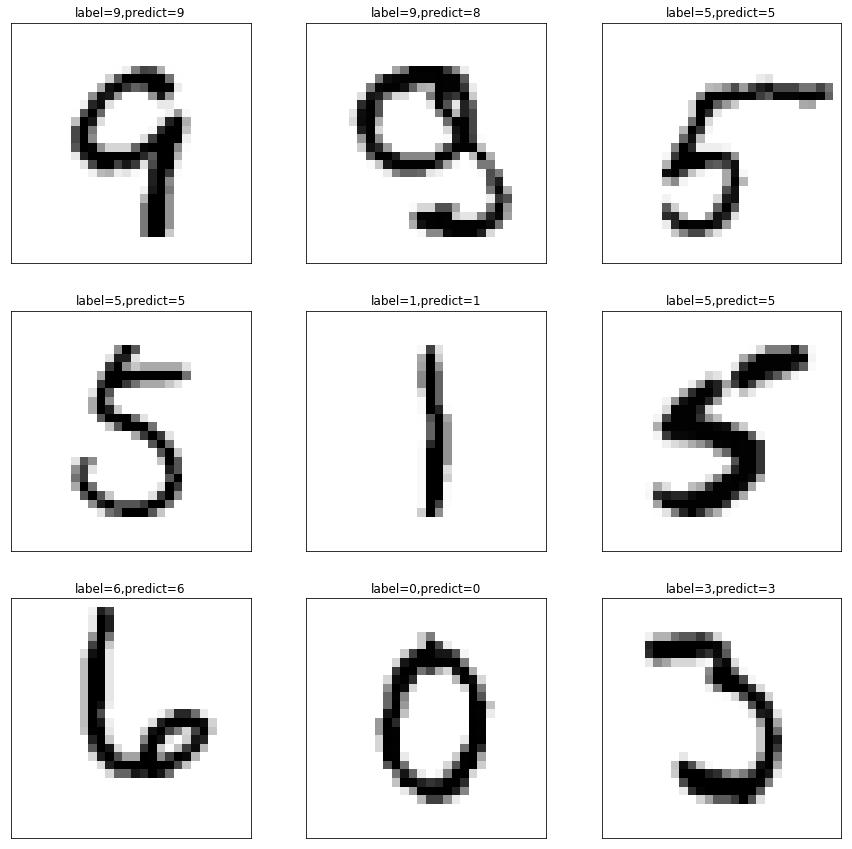

In [72]:
plot_figures_labels(X_test,y_test,predicted_classes,idx=150,num=9)

In [73]:
incorrect_indices
    

array([ 151,  199,  259,  321,  340,  445,  495,  582,  619,  646,  684,
        707,  720,  740,  900,  947,  951, 1014, 1032, 1044, 1112, 1156,
       1178, 1182, 1224, 1226, 1232, 1247, 1270, 1299, 1319, 1325, 1328,
       1393, 1395, 1425, 1466, 1494, 1522, 1527, 1530, 1549, 1569, 1681,
       1717, 1754, 1773, 1790, 1813, 1901, 1955, 1969, 2018, 2024, 2053,
       2098, 2109, 2118, 2135, 2182, 2272, 2291, 2293, 2369, 2387, 2422,
       2488, 2560, 2597, 2598, 2648, 2654, 2810, 2877, 2896, 2921, 2939,
       2953, 3030, 3060, 3062, 3073, 3225, 3289, 3422, 3451, 3457, 3503,
       3520, 3549, 3558, 3559, 3567, 3597, 3718, 3776, 3780, 3808, 3811,
       3838, 3853, 3893, 3906, 3941, 3968, 4002, 4027, 4163, 4176, 4193,
       4199, 4211, 4224, 4248, 4256, 4259, 4289, 4294, 4360, 4497, 4504,
       4536, 4571, 4601, 4615, 4619, 4671, 4690, 4724, 4731, 4740, 4807,
       4814, 4823, 4876, 4880, 5068, 5140, 5331, 5401, 5457, 5586, 5600,
       5642, 5676, 5734, 5749, 5888, 5922, 5936, 59

In [78]:
train_data.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])